In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
dataset = pd.read_csv('processed_data.csv')
dataset.head(5)

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,price
0,0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,...,9.0,111,5000.0,21,27,0,1,1,0,13495.0
1,1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,...,9.0,111,5000.0,21,27,0,1,1,0,16500.0
2,2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,...,9.0,154,5000.0,19,26,0,1,1,0,16500.0
3,3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,...,10.0,102,5500.0,24,30,0,1,1,0,13950.0
4,4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,...,8.0,115,5500.0,18,22,0,1,1,0,17450.0


#  Strong Linear relationship

Here we will check the dependency of the price with the independent variables in the dataset

(0.0, 53113.5477704478)

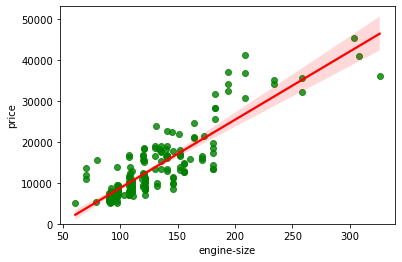

In [3]:
sns.regplot(x="engine-size", y="price", data=dataset,scatter_kws={"color": "green"},line_kws={"color": "red"})
plt.ylim(0,)

In the above graph we can see that as engine-size increases, the price also increases which indicates there is a positive direct correlation between these two variables.By this result, engine-size is a good predictor of the price.

<AxesSubplot:xlabel='horsepower', ylabel='price'>

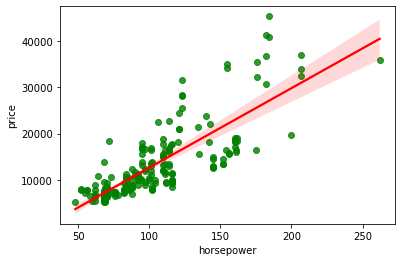

In [4]:
sns.regplot(x="horsepower", y="price", data=dataset,scatter_kws={"color": "green"}, line_kws={"color": "red"})

In the above graph, it is clearly visible that as horsepower increases the price also increases.With this we can also consider the horsepower as the good predictor of price.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

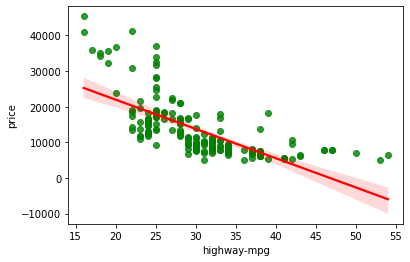

In [5]:
sns.regplot(x="highway-mpg", y="price", data=dataset,scatter_kws={"color": "green"}, line_kws={"color": "red"})

From the above graph, it shows that the highway-mpg has a negative relationship with the price. Here the highway-mpg variable is inversely proportional to the price. So the highway-mpg is also pretty good predictor of the price

# Weak Linear relationship

Similarly, we will check other variables in the dataset. Below, we will check the peak-rpm relationship with the price.

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

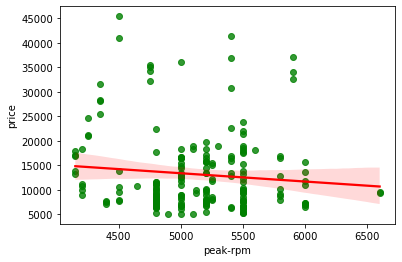

In [6]:
sns.regplot(x="peak-rpm", y="price", data=dataset,scatter_kws={"color": "green"}, line_kws={"color": "red"})

In the above graph, peak-rpm is not good predictor of price. Because the line is pretty much close to horizontal. Morever some datapoints are scattered and far from the fitted line. So it shows there is lot variablitity.
So peak-rpm is not good predictor of the price.


<AxesSubplot:xlabel='stroke', ylabel='price'>

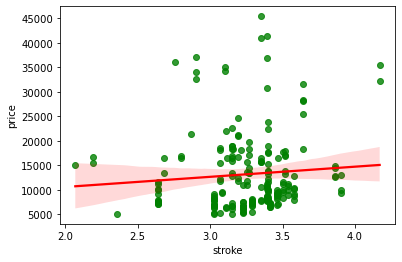

In [7]:
sns.regplot(x="stroke", y="price", data=dataset,scatter_kws={"color": "green"}, line_kws={"color": "red"})

Similarly in the above graph, Stroke is not a good predictor of the price as peak-rpm

# Splitting and Training data

In [8]:
X=dataset.drop('price', axis=1)
y=dataset[['price']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Linear Regression Model

In strong linear relationship, we got good predictor for the price. So we will consider them to use in the linear regression model

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train[['engine-size']], y_train)
y_pred = lin_reg.predict(X_test[['engine-size']])
r2_score(y_test, y_pred)

0.7245780486466742

In [11]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

[-5912.00764431]
[[148.25615153]]


In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

33696986.98421673

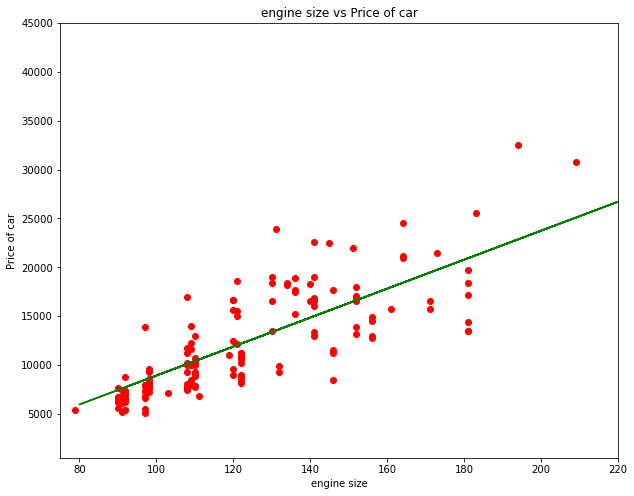

In [13]:
fig = plt.figure()
fig.set_size_inches(10, 8)
plt.xlim([75,220])  
plt.ylim([500, 45000])
plt.scatter(np.array(X_train[['engine-size']]), np.array(y_train), color = "red")
plt.plot(np.array(X_test[['engine-size']]),np.array(y_pred), color = "green")
plt.title("engine size vs Price of car")
plt.xlabel("engine size")
plt.ylabel("Price of car")
plt.show()

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train[['horsepower']], y_train)
y_pred = lin_reg.predict(X_test[['horsepower']])
r2_score(y_test, y_pred)

0.6232911525308579

In [15]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

[-2907.6279431]
[[151.89853872]]


In [16]:
mse_horsepower = mean_squared_error(y_test, y_pred)
mse_horsepower

46089111.879548386

# Multiple Linear regression

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train[['horsepower', 'wheel-base', 'engine-size']], y_train)
y_pred = lin_reg.predict(X_test[['horsepower', 'wheel-base', 'engine-size']])
r2_score(y_test, y_pred)

0.7459190825061828

In [18]:
mse_multiple = mean_squared_error(y_test, y_pred)
mse_multiple

31085980.357257448

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.8038996471969073

In [20]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

[-62941.05383421]
[[-1.40901952e+01  4.28430807e+02  3.02726585e+00  2.61095601e+02
  -7.80520433e+03  2.84433966e+04  9.38697939e+03  7.43537586e-02
   9.19486536e+01  2.27663451e+02 -2.58947334e+03  7.94796052e+02
   3.66214745e+01  9.66506230e-01 -2.92791857e+02  2.04123764e+02
  -4.05246203e+03  4.05246203e+03 -5.12193841e+02  5.12193841e+02]]


In [21]:
mse_multiple = mean_squared_error(y_test, y_pred)
mse_multiple

23992245.365835216

# Ridge Regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $\lambda\sum_{i=1}^{n}w_{i}^{2}$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance. <br>
The hyperparameter $\alpha$(the $\lambda$ parameter in our notations) controls how much you want to regularize the model. If $\alpha$ = 0, then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean. <br>
More information on Ridge Regression: <br>

In [22]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
r2_score(y_test, y_pred)

0.8020349098400411

In [23]:
mse_ridge = mean_squared_error(y_test, y_pred)
mse_ridge

24220389.964094535

# Lasso Regression
**L**east **A**bsolute **S**hrinkage and **S**election **O**perator Regression (usually simply called **Lasso Regression**) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm.

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
r2_score(y_test, y_pred)

0.8023969679664774

In [25]:
mse_lasso = mean_squared_error(y_test, y_pred)
mse_lasso

24176093.32065669

# Conclusion

Metrics used are:
R squared value
Mean Sqaured error

Model with the higher R-squared value is a better fit for the data.

Model with the smallest MSE value is a better fit for the data.

Out of the four models, the best model for the data set is Lasso regression because it has high R squared value and less Mean squared error compare to other models

In linear regression, we got R sqaured value 0.72 compared to other models we got 0.80. It shows the price does not only depend single independent variable, which means the price depend on more than one variable in the dataset.